In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans

# Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

#Data Dictionary for Market Segmentation:

spending: Amount spent by the customer per month (in 1000s)
    
advance_payments: Amount paid by the customer in advance by cash (in 100s)
    
probability_of_full_payment: Probability of payment done in full by the customer to the bank
    
current_balance: Balance amount left in the account to make purchases (in 1000s)
    
credit_limit: Limit of the amount in credit card (10000s)
    
min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
    
max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

**Read the data**

In [44]:
bank_marketing_df = pd.read_csv('bank_marketing_part1_Data.csv')

**The necessary initial steps & exploratory data analysis**

In [45]:
bank_marketing_df.head(10)   #Top 10 entries

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
5,12.70,13.41,0.8874,5.183,3.091,8.456,5.000
6,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
7,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
8,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
9,11.23,12.88,0.8511,5.140,2.795,4.325,5.003


In [46]:
bank_marketing_df.tail(10)     #Bottom 10 entries

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
200,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
201,17.08,15.38,0.9079,5.832,3.683,2.956,5.484
202,14.80,14.52,0.8823,5.656,3.288,3.112,5.309
203,11.55,13.10,0.8455,5.167,2.845,6.715,4.956
204,16.41,15.25,0.8866,5.718,3.525,4.217,5.618
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [47]:
bank_marketing_df.shape      

(210, 7)

In [48]:
bank_marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [49]:
bank_marketing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [50]:
bank_marketing_df.isnull()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
205,False,False,False,False,False,False,False
206,False,False,False,False,False,False,False
207,False,False,False,False,False,False,False
208,False,False,False,False,False,False,False


In [51]:
bank_marketing_df.isnull().any()

spending                        False
advance_payments                False
probability_of_full_payment     False
current_balance                 False
credit_limit                    False
min_payment_amt                 False
max_spent_in_single_shopping    False
dtype: bool

In [52]:
bank_marketing_df.isnull().any().sum()

0

In [53]:
bank_marketing_df.index

RangeIndex(start=0, stop=210, step=1)

In [54]:
bank_marketing_df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping'],
      dtype='object')

In [55]:
bank_marketing_df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

# Univariate Bi-variate, and multivariate analysis

In [56]:
print("The 25th quantile of spending is",bank_marketing_df['spending'].quantile(0.25))
print("The median or 50th quantile of spending is",bank_marketing_df['spending'].quantile(0.5))
print("The 75th quantile of spending is",bank_marketing_df['spending'].quantile(0.75))
print("The distribution of spending is normal but little right skewed",bank_marketing_df['spending'].skew())

The 25th quantile of spending is 12.27
The median or 50th quantile of spending is 14.355
The 75th quantile of spending is 17.305
The distribution of spending is normal but little right skewed 0.3998891917177586


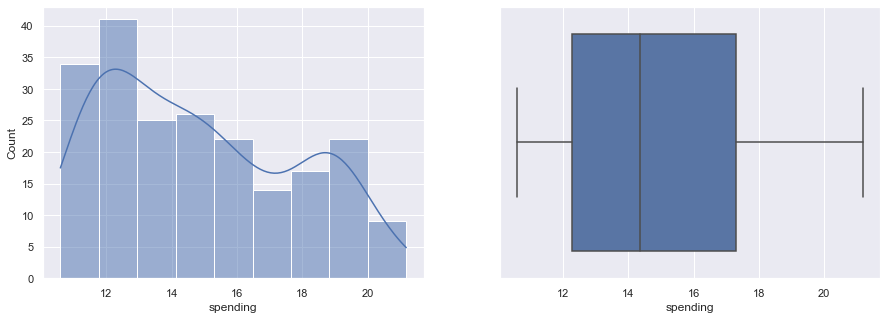

In [57]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(bank_marketing_df['spending'], kde=True, ax=axes[0])
sns.boxplot(x='spending', data=bank_marketing_df, ax=axes[1])
plt.show()

In [58]:
print("The 25th quantile of advance_payments is",bank_marketing_df['advance_payments'].quantile(0.25))
print("The median or 50th quantile of advance_payments is",bank_marketing_df['advance_payments'].quantile(0.5))
print("The 75th quantile of advance_payments is",bank_marketing_df['advance_payments'].quantile(0.75))
print("The distribution of advance_payments is almost normal",bank_marketing_df['advance_payments'].skew())

The 25th quantile of advance_payments is 13.45
The median or 50th quantile of advance_payments is 14.32
The 75th quantile of advance_payments is 15.715
The distribution of advance_payments is almost normal 0.3865727731912213


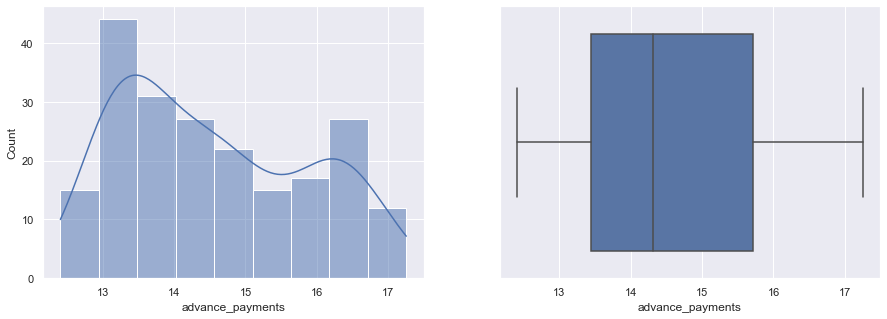

In [59]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(bank_marketing_df['advance_payments'], kde=True, ax=axes[0])
sns.boxplot(x='advance_payments', data=bank_marketing_df, ax=axes[1])
plt.show()

In [60]:
print("The 25th quantile of probability_of_full_payment is",bank_marketing_df['probability_of_full_payment'].quantile(0.25))
print("The median or 50th quantile of probability_of_full_payment is",bank_marketing_df['probability_of_full_payment'].quantile(0.5))
print("The 75th quantile of probability_of_full_payment is",bank_marketing_df['probability_of_full_payment'].quantile(0.75))
print("The distribution of probability_of_full_payment is left skewed",bank_marketing_df['probability_of_full_payment'].skew())

The 25th quantile of probability_of_full_payment is 0.8569
The median or 50th quantile of probability_of_full_payment is 0.8734500000000001
The 75th quantile of probability_of_full_payment is 0.887775
The distribution of probability_of_full_payment is left skewed -0.5379537283982823


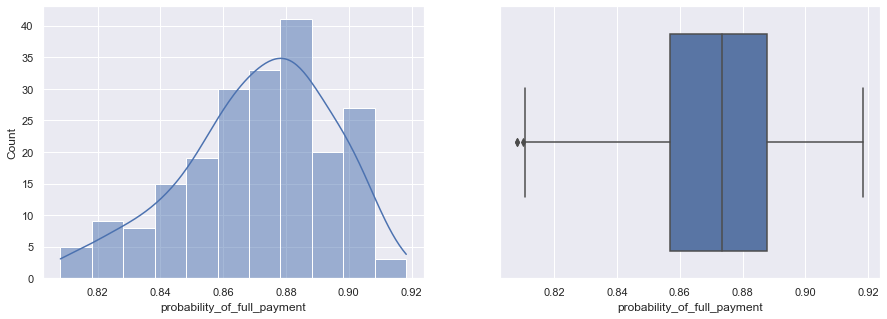

In [61]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(bank_marketing_df['probability_of_full_payment'], kde=True, ax=axes[0])
sns.boxplot(x='probability_of_full_payment', data=bank_marketing_df, ax=axes[1])
plt.show()

In [62]:
print("The 25th quantile of current_balance is",bank_marketing_df['current_balance'].quantile(0.25))
print("The median or 50th quantile of current_balance is",bank_marketing_df['current_balance'].quantile(0.5))
print("The 75th quantile of current_balancet is",bank_marketing_df['current_balance'].quantile(0.75))
print("The distribution of current_balance is normal but little right skewed",bank_marketing_df['current_balance'].skew())

The 25th quantile of current_balance is 5.26225
The median or 50th quantile of current_balance is 5.5235
The 75th quantile of current_balancet is 5.97975
The distribution of current_balance is normal but little right skewed 0.5254815601318906


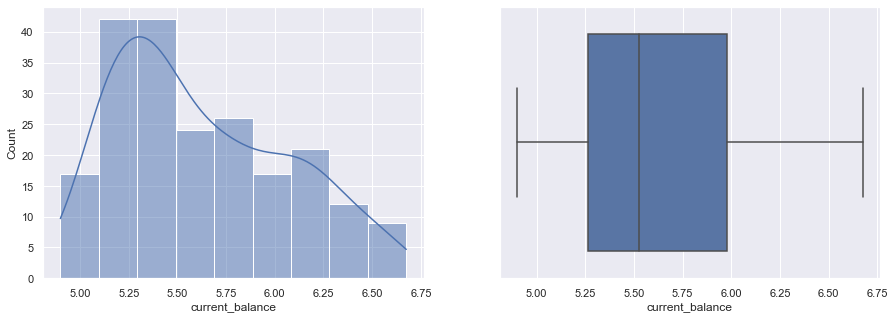

In [63]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(bank_marketing_df['current_balance'], kde=True, ax=axes[0])
sns.boxplot(x='current_balance', data=bank_marketing_df, ax=axes[1])
plt.show()

In [64]:
print("The 25th quantile of credit_limit is",bank_marketing_df['credit_limit'].quantile(0.25))
print("The median or 50th quantile of credit_limit is",bank_marketing_df['credit_limit'].quantile(0.5))
print("The 75th quantile of credit_limit is",bank_marketing_df['credit_limit'].quantile(0.75))
print("The distribution of credit_limit is normal",bank_marketing_df['credit_limit'].skew())

The 25th quantile of credit_limit is 2.944
The median or 50th quantile of credit_limit is 3.237
The 75th quantile of credit_limit is 3.56175
The distribution of credit_limit is normal 0.1343782451316215


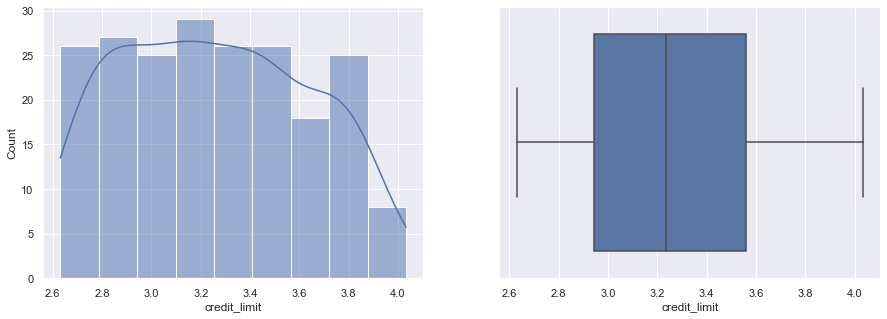

In [65]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(bank_marketing_df['credit_limit'], kde=True, ax=axes[0])
sns.boxplot(x='credit_limit', data=bank_marketing_df, ax=axes[1])
plt.show()

In [66]:
print("The 25th quantile of min_payment_amt is",bank_marketing_df['min_payment_amt'].quantile(0.25))
print("The median or 50th quantile of min_payment_amt is",bank_marketing_df['min_payment_amt'].quantile(0.5))
print("The 75th quantile of min_payment_amt is",bank_marketing_df['min_payment_amt'].quantile(0.75))
print("The distribution of min_payment_amt is normal",bank_marketing_df['min_payment_amt'].skew())

The 25th quantile of min_payment_amt is 2.5615
The median or 50th quantile of min_payment_amt is 3.599
The 75th quantile of min_payment_amt is 4.76875
The distribution of min_payment_amt is normal 0.40166734329025183


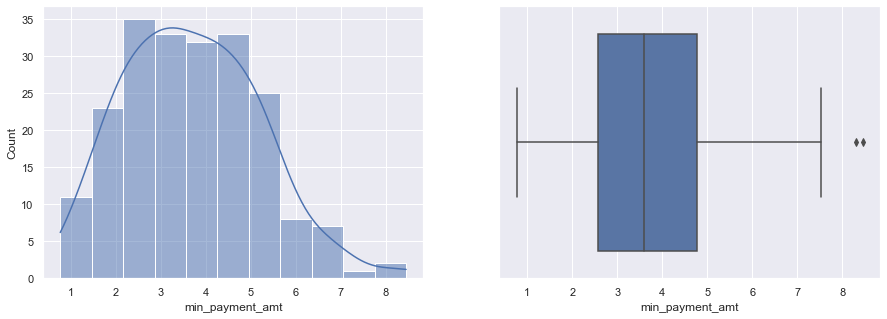

In [67]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(bank_marketing_df['min_payment_amt'], kde=True, ax=axes[0])
sns.boxplot(x='min_payment_amt', data=bank_marketing_df, ax=axes[1])
plt.show()

In [68]:
print("The 25th quantile of max_spent_in_single_shopping is",bank_marketing_df['max_spent_in_single_shopping'].quantile(0.25))
print("The median or 50th quantile of max_spent_in_single_shopping is",bank_marketing_df['max_spent_in_single_shopping'].quantile(0.5))
print("The 75th quantile of max_spent_in_single_shopping is",bank_marketing_df['max_spent_in_single_shopping'].quantile(0.75))
print("The distribution of max_spent_in_single_shopping is normal",bank_marketing_df['max_spent_in_single_shopping'].skew())

The 25th quantile of max_spent_in_single_shopping is 5.045
The median or 50th quantile of max_spent_in_single_shopping is 5.223000000000001
The 75th quantile of max_spent_in_single_shopping is 5.877
The distribution of max_spent_in_single_shopping is normal 0.561897374954866


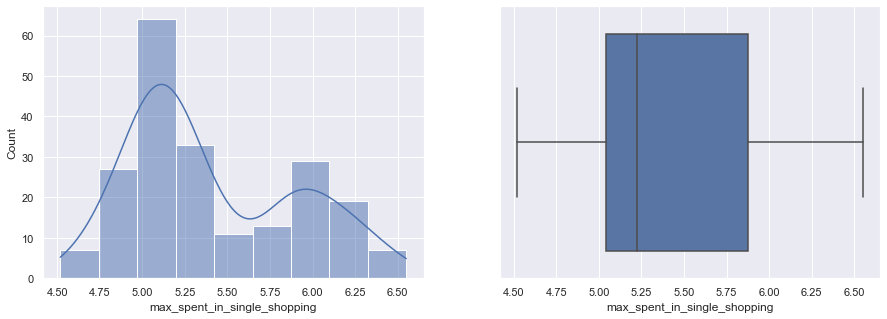

In [69]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(bank_marketing_df['max_spent_in_single_shopping'], kde=True, ax=axes[0])
sns.boxplot(x='max_spent_in_single_shopping', data=bank_marketing_df, ax=axes[1])
plt.show()

# Bi-Variate Analysis

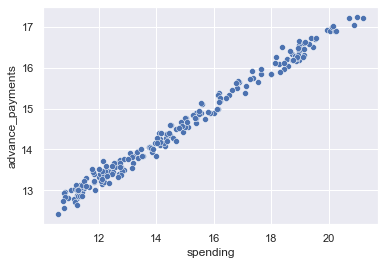

In [70]:
sns.scatterplot(bank_marketing_df["spending"],bank_marketing_df["advance_payments"]);

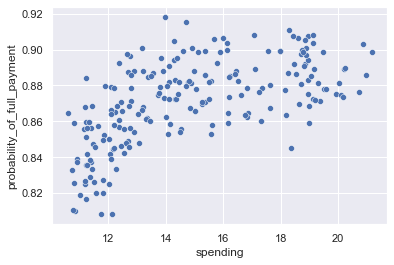

In [71]:
sns.scatterplot(bank_marketing_df["spending"],bank_marketing_df["probability_of_full_payment"]);

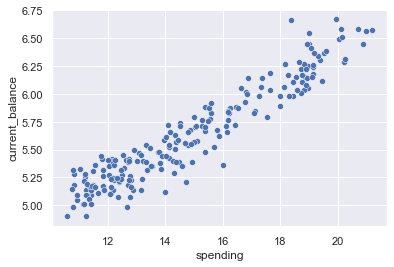

In [72]:
sns.scatterplot(bank_marketing_df["spending"],bank_marketing_df["current_balance"]);

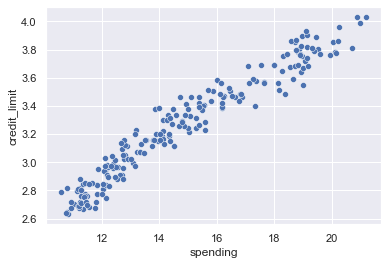

In [73]:
sns.scatterplot(bank_marketing_df["spending"],bank_marketing_df["credit_limit"]);

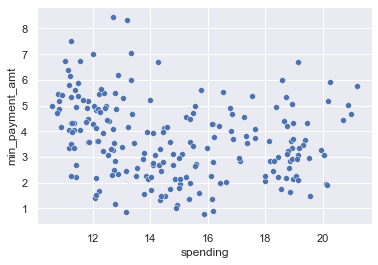

In [74]:
sns.scatterplot(bank_marketing_df["spending"],bank_marketing_df["min_payment_amt"]);

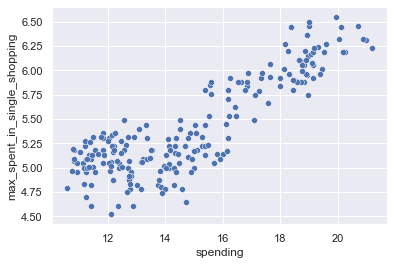

In [75]:
sns.scatterplot(bank_marketing_df["spending"],bank_marketing_df["max_spent_in_single_shopping"]);

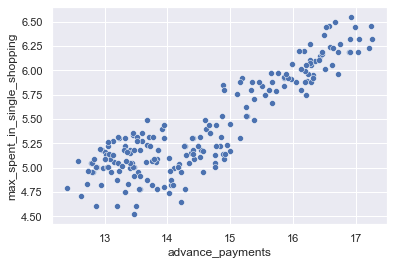

In [76]:
sns.scatterplot(bank_marketing_df["advance_payments"],bank_marketing_df["max_spent_in_single_shopping"]);

#Multivariate Analysis

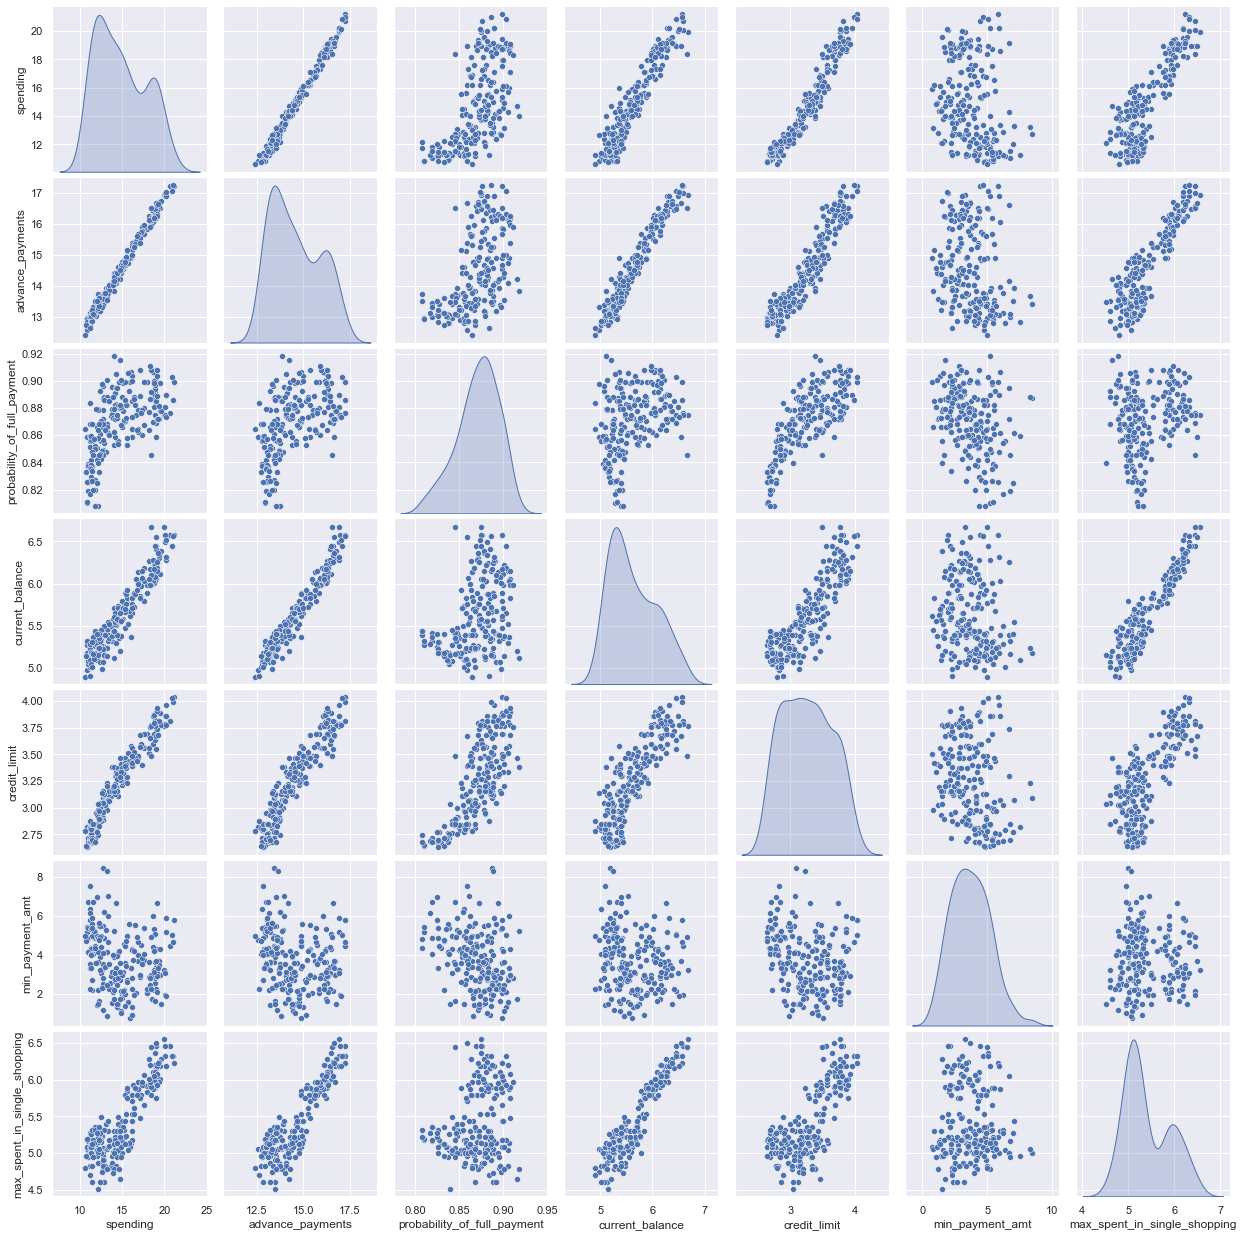

In [77]:
fig.set_size_inches(15,5)
sns.pairplot(bank_marketing_df, diag_kind='kde');

In [78]:
corr = bank_marketing_df.corr()
round(corr,2)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.00,0.99,0.61,0.95,0.97,-0.23,0.86
advance_payments,0.99,1.00,0.53,0.97,0.94,-0.22,0.89
probability_of_full_payment,0.61,0.53,1.00,0.37,0.76,-0.33,0.23
current_balance,0.95,0.97,0.37,1.00,0.86,-0.17,0.93
credit_limit,0.97,0.94,0.76,0.86,1.00,-0.26,0.75
min_payment_amt,-0.23,-0.22,-0.33,-0.17,-0.26,1.00,-0.01
max_spent_in_single_shopping,0.86,0.89,0.23,0.93,0.75,-0.01,1.00


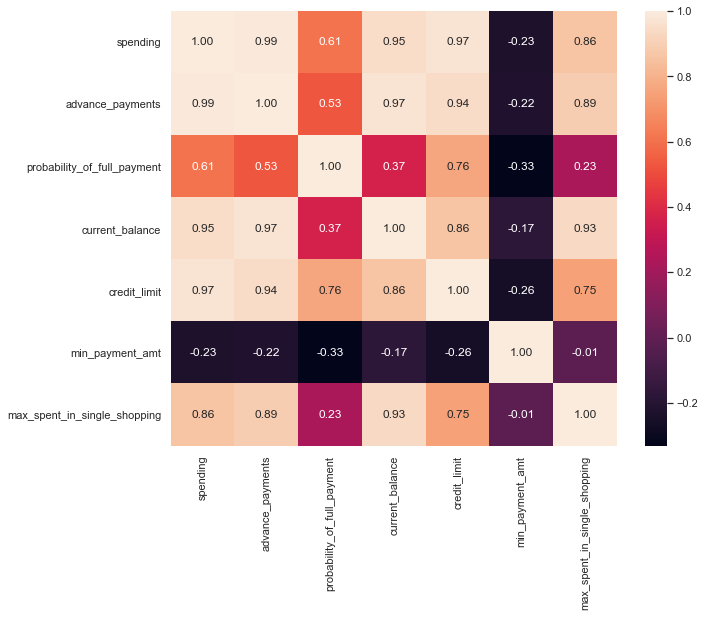

In [79]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(bank_marketing_df.corr(), annot=True,fmt='.2f');

# 1.2  Do you think scaling is necessary for clustering in this case? Justify

Yes, scaling is necessary for clustering in this case before building clustering algorithim scaling of data is important otherwise model will not be accurate and the values of the datapoint will differ. It is applied to independent variables which helps to normalise the data in a
particular range. If feature scaling is not done, then a machine learning algorithm tends to weigh
greater values, higher and consider smaller values as the lower values, regardless of the unit of the
values.
For the data given to us, scaling is required as all the variables are expressed in different units such as
spending in 1000’s, advance payments in 100’s and credit limit in 10000’s, whereas probability is
expressed as fraction or decimal values. Since the other values expressed in higher units will
outweigh probabilities and can give varied results hence it is important to Scale the data using
Standard Scaler and therefore normalise the values where the means will be 0 and standard
deviation 1

In [80]:
from sklearn.preprocessing import StandardScaler 

In [81]:
X=StandardScaler()

In [82]:
scaled_bank_marketing_df = X.fit_transform(bank_marketing_df)

In [83]:
scaled_bank_marketing_df

array([[ 1.75435461,  1.81196782,  0.17822987, ...,  1.33857863,
        -0.29880602,  2.3289982 ],
       [ 0.39358228,  0.25383997,  1.501773  , ...,  0.85823561,
        -0.24280501, -0.53858174],
       [ 1.41330028,  1.42819249,  0.50487353, ...,  1.317348  ,
        -0.22147129,  1.50910692],
       ...,
       [-0.2816364 , -0.30647202,  0.36488339, ..., -0.15287318,
        -1.3221578 , -0.83023461],
       [ 0.43836719,  0.33827054,  1.23027698, ...,  0.60081421,
        -0.95348449,  0.07123789],
       [ 0.24889256,  0.45340314, -0.77624835, ..., -0.07325831,
        -0.70681338,  0.96047321]])

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [88]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [90]:
wardlink = linkage(scaled_bank_marketing_df, method = 'ward')

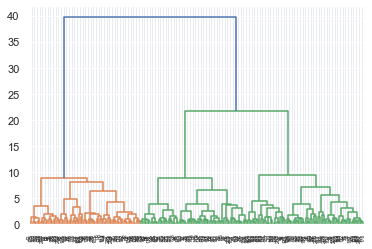

In [110]:
dend = dendrogram(wardlink)

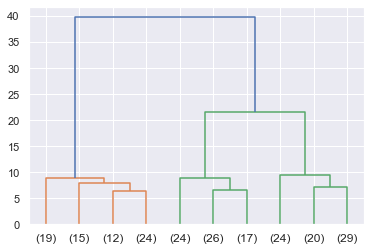

In [91]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

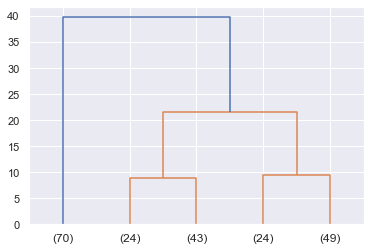

In [92]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 5,
                 )

In [93]:
from scipy.cluster.hierarchy import fcluster

In [94]:
#Method 1

clusters = fcluster(wardlink, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [95]:
#Method 2

clusters1 = fcluster(wardlink, 18, criterion='distance')
clusters1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [97]:
bank_marketing_df['clusters'] = clusters

In [99]:
bank_marketing_df.to_csv('Clusters_3.csv')

In [100]:
bank_marketing_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [101]:
bank_marketing_df['clusters'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters, dtype: int64

In [102]:
agglo_data=bank_marketing_df.groupby('clusters').mean()
agglo_data['Freq']=bank_marketing_df['clusters'].value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [103]:
from sklearn.cluster import AgglomerativeClustering

In [105]:
clusters= AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
cluster_agglo=clusters.fit_predict(scaled_bank_marketing_df)
print(cluster_agglo)

[1 0 1 2 1 2 2 0 1 2 1 0 2 1 0 2 0 2 0 2 2 2 1 2 0 1 0 2 2 2 0 2 2 0 2 2 2
 2 2 1 1 0 1 1 2 2 0 1 1 1 2 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 2 0 2 1 1
 2 1 0 2 1 0 0 0 0 1 2 0 0 1 1 2 0 1 0 2 2 1 1 1 2 1 2 1 0 1 0 1 1 2 2 1 0
 0 1 2 2 1 0 0 2 1 0 2 2 2 0 0 1 2 0 0 2 0 0 1 2 1 1 2 1 0 0 0 2 2 0 2 1 2
 0 2 0 2 0 0 0 0 0 2 0 1 1 2 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0 0 1 2 0 0 0 0 1
 1 0 0 0 2 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 1 0]


In [106]:
bank_marketing_df["Agglo_clusters"]=cluster_agglo

In [107]:
bank_marketing_df.columns

Index(['spending', 'advance_payments', 'probability_of_full_payment',
       'current_balance', 'credit_limit', 'min_payment_amt',
       'max_spent_in_single_shopping', 'clusters', 'Agglo_clusters'],
      dtype='object')

In [109]:
agglo_data=bank_marketing_df.drop(["clusters"],axis=1).groupby("Agglo_clusters").mean()
agglo_data["Freq"]=bank_marketing_df.Agglo_clusters.value_counts().sort_index()
agglo_data

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_clusters,,,,,,,,
0,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [113]:
from sklearn.cluster import KMeans

In [114]:
k_means = KMeans(n_clusters = 1, random_state=1)
k_means.fit(scaled_bank_marketing_df)
k_means.inertia_

1469.9999999999995

In [115]:
k_means = KMeans(n_clusters = 2, random_state=1)
k_means.fit(scaled_bank_marketing_df)
k_means.inertia_

659.1717544870411

In [116]:
k_means = KMeans(n_clusters = 3, random_state=1)
k_means.fit(scaled_bank_marketing_df)
k_means.inertia_

430.65897315130064

In [117]:
k_means = KMeans(n_clusters = 4, random_state=1)
k_means.fit(scaled_bank_marketing_df)
k_means.inertia_

371.301721277542

In [118]:
k_means = KMeans(n_clusters = 5, random_state=1)
k_means.fit(scaled_bank_marketing_df)
k_means.inertia_

327.9608240079031

Calculating WSS for other values of K- Elbow Method

In [119]:
wss =[] 

In [120]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_bank_marketing_df)
    wss.append(KM.inertia_)

In [121]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.301721277542,
 327.9608240079031,
 290.5900305968219,
 264.83153087478144,
 240.6837259501598,
 220.85285825594738,
 206.3829103601579]

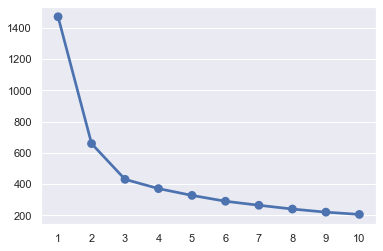

In [122]:
a=[1,2,3,4,5,6,7,8,9,10]
sns.pointplot(a,wss);

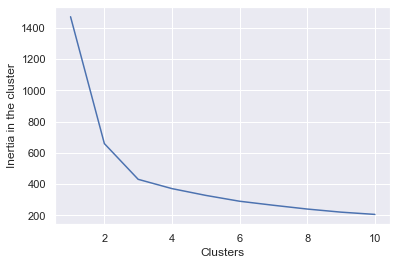

In [123]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

In [124]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [125]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_bank_marketing_df)
labels_2 = k_means.labels_

In [126]:
# Cluster_2
silhouette_score(scaled_bank_marketing_df,labels_2, random_state=1)

0.46577247686580914

In [127]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_bank_marketing_df)
labels_3 = k_means.labels_

In [131]:
bank_marketing_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1


In [133]:
bank_marketing_df["kmeans3"] = labels_3
bank_marketing_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_clusters,kmeans3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,2
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1


In [134]:
bank_marketing_df['kmeans3'].value_counts().sort_index()

0    72
1    67
2    71
Name: kmeans3, dtype: int64

In [135]:
sil_width = silhouette_samples(scaled_bank_marketing_df, labels_3)

In [136]:
bank_marketing_df['sil_width'] = sil_width
bank_marketing_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_clusters,kmeans3,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,1,1,0.573699
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0,2,0.366386
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,1,1,0.637784
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2,2,0,0.512458
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,1,1,0.362276


In [137]:
silhouette_samples(scaled_bank_marketing_df, labels_3).min()

0.002713089347678376

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [138]:
clust_profile=bank_marketing_df
clust_profile=clust_profile.groupby("kmeans3").mean()
clust_profile["Freq"]=bank_marketing_df['kmeans3'].value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Agglo_clusters,sil_width,Freq
kmeans3,,,,,,,,,,,
0,11.856944,13.247778,0.848253,5.231750,2.849542,4.742389,5.101722,2.083333,1.833333,0.397473,72
1,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,0.985075,0.468772,67
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,2.873239,0.084507,0.339816,71


                                                       **END**

# Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

Attribute Information:

1. Target: Claim Status (Claimed)
    
2. Code of tour firm (Agency_Code)

3. Type of tour insurance firms (Type)

4. Distribution channel of tour insurance agencies (Channel)

5. Name of the tour insurance products (Product)

6. Duration of the tour (Duration in days)

7. Destination of the tour (Destination)

8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)

9. The commission received for tour insurance firm (Commission is in percentage of sales)

10.Age of insured (Age)

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

Read the data

In [141]:
insurance_df = pd.read_csv('insurance_part2_data.csv')

The necessary initial steps, and exploratory data analysis

In [142]:
insurance_df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [144]:
insurance_df.tail(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2990,51,EPX,Travel Agency,No,0.00,Online,2,20.00,Customised Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2992,28,CWT,Travel Agency,No,11.88,Online,389,19.80,Customised Plan,ASIA
2993,36,EPX,Travel Agency,No,0.00,Online,234,10.00,Cancellation Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [85]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [86]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [87]:
insurance_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
insurance_df.duplicated().sum()

139

In [89]:
insurance_df.shape

(3000, 10)

In [90]:
insurance_df.isnull()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False


In [91]:
insurance_df.isnull().any()

Age             False
Agency_Code     False
Type            False
Claimed         False
Commision       False
Channel         False
Duration        False
Sales           False
Product Name    False
Destination     False
dtype: bool

In [92]:
insurance_df.isnull().any().sum() # No null value

0

In [93]:
insurance_df.dtypes # Convert object to int

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [94]:
insurance_df.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

# Univariate, Bi-variate, and multivariate analysis

Univariate Analysis

In [95]:
print("The 25th quantile of Age is",insurance_df['Age'].quantile(0.25))
print("The median or 50th quantile of Age is",insurance_df['Age'].quantile(0.5))
print("The 75th quantile of Age is",insurance_df['Age'].quantile(0.75))
print("The distribution of Age is normal but little right skewed",insurance_df['Age'].skew())

The 25th quantile of Age is 32.0
The median or 50th quantile of Age is 36.0
The 75th quantile of Age is 42.0
The distribution of Age is normal but little right skewed 1.149712770495169


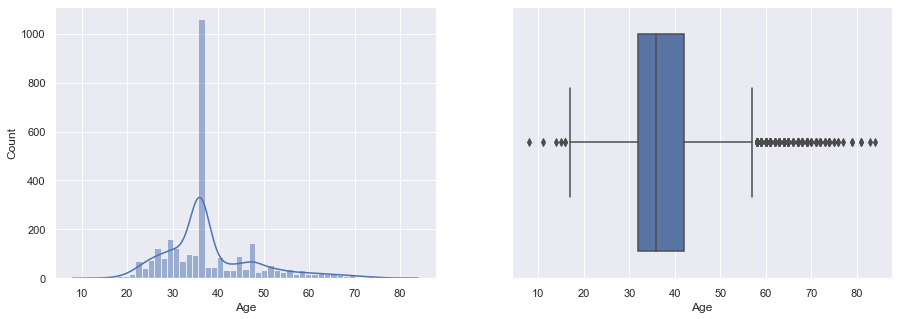

In [96]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(insurance_df['Age'], kde=True, ax=axes[0])
sns.boxplot(x='Age', data=insurance_df, ax=axes[1])
plt.show()

In [150]:
print("The 25th quantile of is Commision",insurance_df['Commision'].quantile(0.25))
print("The median or 50th quantile of Commision is",insurance_df['Commision'].quantile(0.5))
print("The 75th quantile of Commision is",insurance_df['Commision'].quantile(0.75))
print("The distribution of Commision is normal but little right skewed",insurance_df['Commision'].skew())

The 25th quantile of is Commision 0.0
The median or 50th quantile of Commision is 4.63
The 75th quantile of Commision is 17.235
The distribution of Commision is normal but little right skewed 3.148857772356885


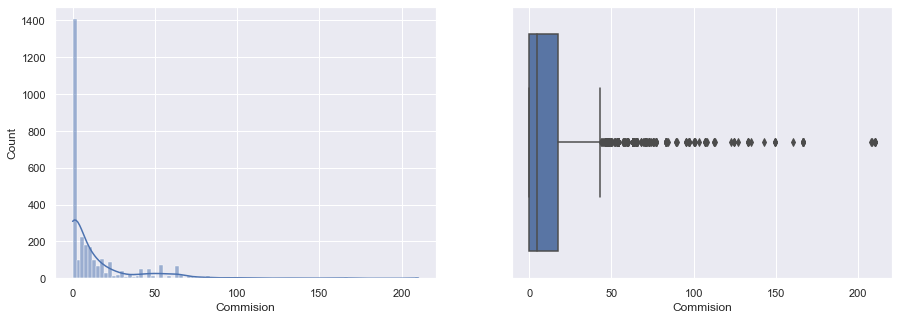

In [148]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(insurance_df['Commision'], kde=True, ax=axes[0])
sns.boxplot(x='Commision', data=insurance_df, ax=axes[1])
plt.show()

In [151]:
print("The 25th quantile of Duration is",insurance_df['Duration'].quantile(0.25))
print("The median or 50th quantile of Duration is",insurance_df['Duration'].quantile(0.5))
print("The 75th quantile of Duration is",insurance_df['Duration'].quantile(0.75))
print("The distribution of Duration is normal but little right skewed",insurance_df['Duration'].skew())

The 25th quantile of Duration is 11.0
The median or 50th quantile of Duration is 26.5
The 75th quantile of Duration is 63.0
The distribution of Duration is normal but little right skewed 13.784681027519602


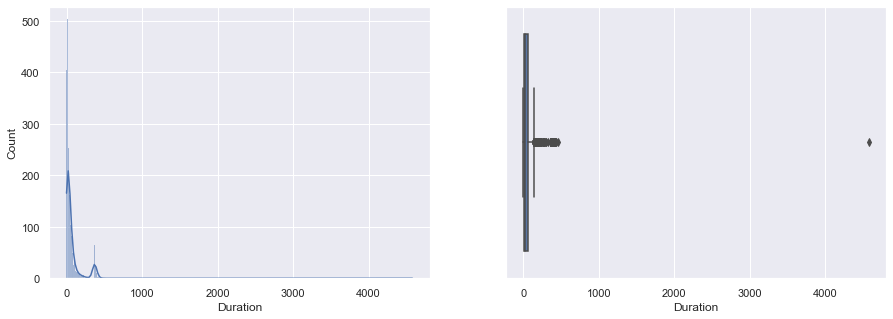

In [152]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(insurance_df['Duration'], kde=True, ax=axes[0])
sns.boxplot(x='Duration', data=insurance_df, ax=axes[1])
plt.show()

In [154]:
print("The 25th quantile of Sales is",insurance_df['Sales'].quantile(0.25))
print("The median or 50th quantile of Sales is",insurance_df['Sales'].quantile(0.5))
print("The 75th quantile of Sales is",insurance_df['Sales'].quantile(0.75))
print("The distribution of Sales is normal but little right skewed",insurance_df['Sales'].skew())

The 25th quantile of Sales is 20.0
The median or 50th quantile of Sales is 33.0
The 75th quantile of Sales is 69.0
The distribution of Sales is normal but little right skewed 2.381148461687274


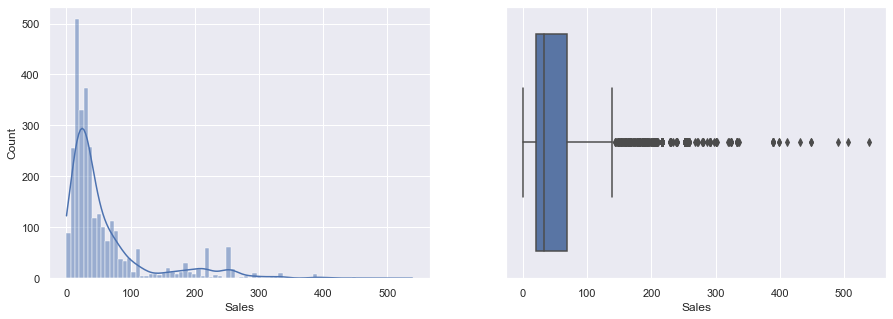

In [153]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(15,5)
sns.histplot(insurance_df['Sales'], kde=True, ax=axes[0])
sns.boxplot(x='Sales', data=insurance_df, ax=axes[1])
plt.show()

Bivariate Analysis

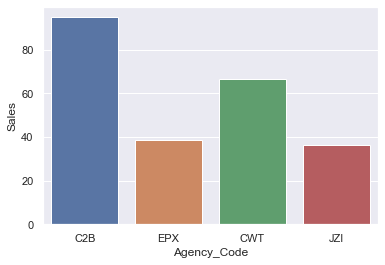

In [156]:
sns.barplot(x="Agency_Code",y="Sales",ci=None,data=insurance_df);
plt.show()

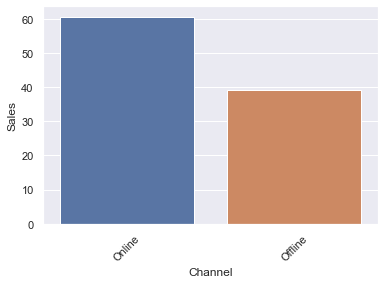

In [157]:
sns.barplot(x="Channel",y="Sales",ci=None,data=insurance_df);
plt.xticks(rotation=45)
plt.show()

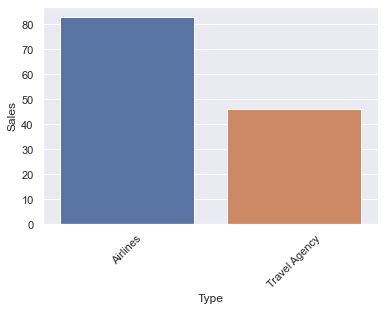

In [158]:
sns.barplot(x="Type",y="Sales",ci=None,data=insurance_df);
plt.xticks(rotation=45)
plt.show()

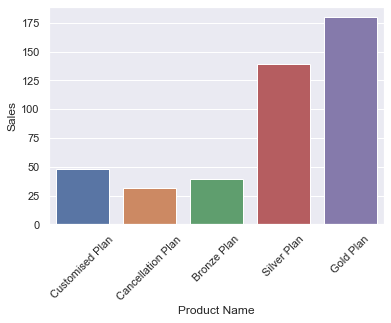

In [159]:
sns.barplot(x="Product Name",y="Sales",ci=None,data=insurance_df);
plt.xticks(rotation=45)
plt.show()

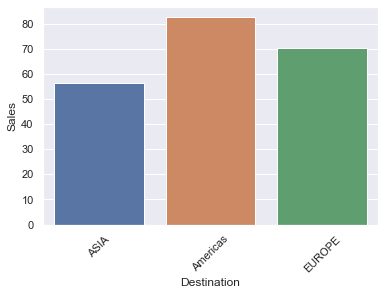

In [160]:
sns.barplot(x="Destination",y="Sales",ci=None,data=insurance_df);
plt.xticks(rotation=45)
plt.show()

Multiivariate Analysis

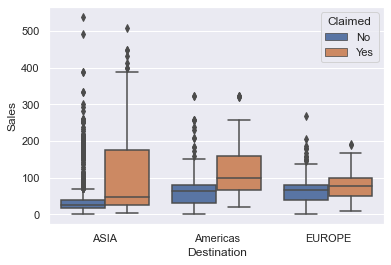

In [164]:
sns.boxplot(x="Destination",y="Sales",hue="Claimed",data=insurance_df);

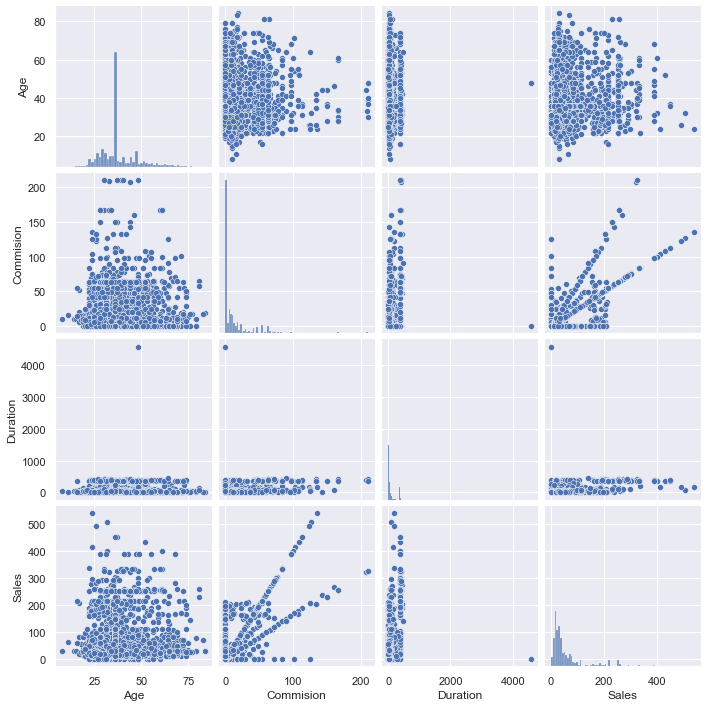

In [162]:
sns.pairplot(insurance_df[['Age', 'Commision', 'Duration', 'Sales']]);

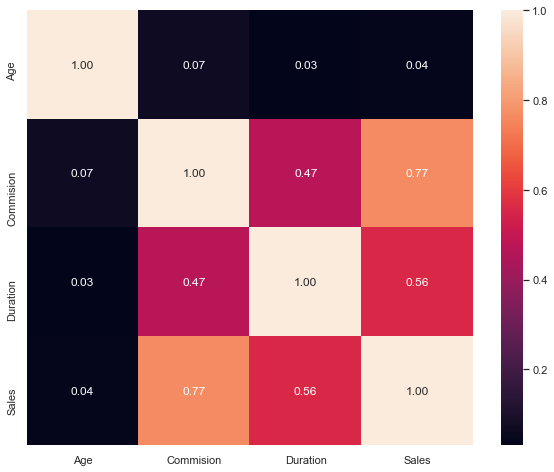

In [163]:
#Check for presence of correlations
plt.figure(figsize = (10,8))
sns.heatmap(insurance_df[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot=True,fmt='.2f');

# 2.2# Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [252]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [253]:
df2 = pd.read_csv("insurance_part2_data.csv")

In [254]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [255]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [256]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [257]:
for feature in df2.columns:
    if df2[feature].dtype == 'object':
        df2[feature] = pd.Categorical(df2[feature]).codes

In [258]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [259]:
df2['Claimed'].sum()

924

In [260]:
x = df2.drop("Claimed", axis = 1)

y = df2.pop("Claimed")

In [261]:
#Splitting data into training and test dataset
from sklearn.model_selection import train_test_split

In [262]:
x_train, x_test, train_labels, test_labels = train_test_split(x, y, test_size = 30, random_state = 1)

In [263]:
dt_model = DecisionTreeClassifier(criterion ='gini')

In [264]:
dt_model.fit(x_train, train_labels)

DecisionTreeClassifier()

In [265]:
from sklearn import tree

In [266]:
train_char_label = ['No','Yes']
Insurance_Tree_File = open('d:\insur_tree.dot','w')
tree.export_graphviz(dt_model, out_file= Insurance_Tree_File, feature_names = list(x_train), class_names = train_char_label)
Insurance_Tree_File.close()

Regularising the Decision Tree

In [267]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, min_samples_leaf = 10, min_samples_split = 30)

In [268]:
reg_dt_model.fit(x_train, train_labels)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [269]:
credit_tree_regularized = open('d:\credit_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file = credit_tree_regularized, feature_names = list(x_train), class_names = train_char_label)
credit_tree_regularized.close()

                               

In [270]:
ytrain_predict = reg_dt_model.predict(x_train)
ytest_predict = reg_dt_model.predict(x_test)

In [271]:
import matplotlib.pyplot as plt

AUC: 0.855


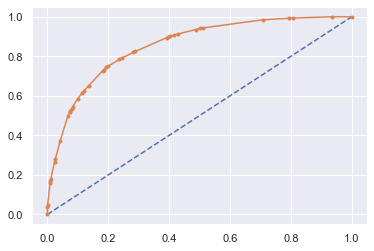

In [272]:
# AUC and ROC for the training data 

# predict probablities
probs = reg_dt_model.predict_proba(x_train)

#keep probabilities for the positive outcome only
probs = probs[:,1]

#calculate AUC 
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.859


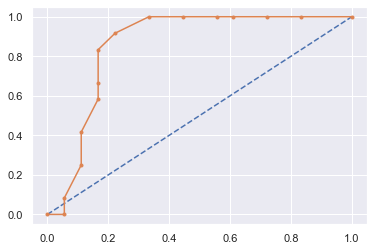

In [273]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [274]:
from sklearn.metrics import classification_report,confusion_matrix

In [275]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2058
           1       0.72      0.58      0.65       912

    accuracy                           0.80      2970
   macro avg       0.78      0.74      0.76      2970
weighted avg       0.80      0.80      0.80      2970



In [276]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        18
           1       0.77      0.83      0.80        12

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.84      0.83      0.83        30



In [277]:
confusion_matrix(train_labels, ytrain_predict)

array([[1854,  204],
       [ 379,  533]], dtype=int64)

In [278]:
confusion_matrix(test_labels, ytest_predict)

array([[15,  3],
       [ 2, 10]], dtype=int64)

In [279]:
reg_dt_model.score(x_train,train_labels)

0.8037037037037037

In [280]:
reg_dt_model.score(x_test,test_labels)


0.8333333333333334

# Ramdom Forest

In [281]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7, 8],
    'max_features': [9, 12, 13],
    'min_samples_leaf': [20, 25],
    'min_samples_split': [60, 75],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [282]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8], 'max_features': [9, 12, 13],
                         'min_samples_leaf': [20, 25],
                         'min_samples_split': [60, 75],
                         'n_estimators': [101, 301]})

In [283]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 9,
 'min_samples_leaf': 20,
 'min_samples_split': 60,
 'n_estimators': 101}

In [284]:
best_grid = grid_search.best_estimator_

In [285]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

In [286]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      2058
           1       0.71      0.61      0.66       912

    accuracy                           0.80      2970
   macro avg       0.77      0.75      0.76      2970
weighted avg       0.80      0.80      0.80      2970



In [287]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        18
           1       0.73      0.67      0.70        12

    accuracy                           0.77        30
   macro avg       0.76      0.75      0.75        30
weighted avg       0.76      0.77      0.76        30



# MLP Classifier (Artificial Neural Network)

In [288]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
x_trains = sc.fit_transform(x_train) 
x_tests = sc.transform (x_test)

In [289]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(100,100,100)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.1,0.01],
    'max_iter' : [10000]
}

rfcl = MLPClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)

In [290]:
ytrain_predict = best_grid.predict(x_trains)
ytest_predict = best_grid.predict(x_tests)

In [291]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82      2058
           1       0.00      0.00      0.00       912

    accuracy                           0.69      2970
   macro avg       0.35      0.50      0.41      2970
weighted avg       0.48      0.69      0.57      2970



In [292]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        18
           1       0.00      0.00      0.00        12

    accuracy                           0.60        30
   macro avg       0.30      0.50      0.37        30
weighted avg       0.36      0.60      0.45        30



# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model

In [293]:
df2 = pd.read_csv("insurance_part2_data.csv")

In [294]:
for feature in insur_df.columns: 
    if df2[feature].dtype == 'object': 
        df2[feature] = pd.Categorical(df2[feature]).codes

In [295]:
insur_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Commision     3000 non-null   float64
 4   Channel       3000 non-null   object 
 5   Duration      3000 non-null   int64  
 6   Sales         3000 non-null   float64
 7   Product Name  3000 non-null   object 
 8   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 211.1+ KB


In [296]:
df2.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,No,0.70,1,7,2.51,2,0
1,36,2,1,No,0.00,1,34,20.00,2,0
2,39,1,1,No,5.94,1,3,9.90,2,1
3,36,2,1,No,0.00,1,4,26.00,1,0
4,33,3,0,No,6.30,1,53,18.00,0,0


In [298]:
df2.Claimed.value_counts(normalize=True)

No     0.692
Yes    0.308
Name: Claimed, dtype: float64

In [225]:
X = insur_df2.drop("Claimed" , axis=1)

y = insur_df2.pop("Claimed")

In [300]:
#Splitting the data into Train & Test sets

X_train, X_test, train_labels  , test_labels  = train_test_split(X, y, test_size=.30, random_state=1)

In [301]:
#Checking the dimensions on train and test data.

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)
print('Total Obs',2002+859)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)
Total Obs 2861


# Building a Decision Tree Classifier (CART Model)

In [ ]:
#Initialise a Decission Tree
dt_model = DecisionTreeClassifier(criterion = 'gini')

In [ ]:
#Fit model
dt_model.fit(X_train,train_labels)

In [ ]:
train_char_label = ['No','Yes']
dm_Tree_File = open('dm_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model,
                               out_file = dm_Tree_File,
                               feature_names = list(X_train),
                               class_names = list(train_char_label))
dm_Tree_File.close()

In [ ]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

In [ ]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [5,6,8,10],
    'min_samples_leaf': [40,45,50],
    'min_samples_split': [200,250,350,450],
}


rfcl = RandomForestClassifier(random_state=1)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [ ]:
grid_search.fit(X_train, train_labels)

In [ ]:
grid_search.best_params_

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:
best_grid

In [ ]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,min_samples_leaf=50,min_samples_split=200,random_state=1)
reg_dt_model.fit(X_train, train_labels)

In [ ]:
from sklearn import tree
train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [ ]:
best_grid.feature_importances_

                                                        **END**